In [571]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from bs4 import BeautifulSoup as bs
import re
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [366]:
cars={'Honda' : ['Honda','CR-V',2019],
      'Ford' : ['Ford','Escape',2019],
      'Hyundai' : ['Hyundai','Santa-Fe',2019],
      'Toyota' : ['Toyota','RAV4',2019],
     }

In [367]:
df_cars=pd.DataFrame(cars).T

df_cars.columns=['make','model','year']

df_cars

,make,model,year
Honda,Honda,CR-V,2019
Ford,Ford,Escape,2019
Hyundai,Hyundai,Santa-Fe,2019
Toyota,Toyota,RAV4,2019


In [368]:
def grab_links(url):
    link=requests.get(url) #grab HTML
    soup=bs(link.content,'html') #turn into soup
    a_tags=soup.findAll('a',attrs={'href':True}) #find all href, i.e. tabs

    links=[] #initialize empty list
    for i in range(len(a_tags)):
        links.append(a_tags[i].attrs['href'])
    return links

In [979]:
for car in df_cars.index:
    link=kbb+'/'+df_cars.make[car]+'/'+df_cars.model[car]+'/'+str(df_cars.year[car])
    print(link)

for car in df_cars.index:
    link=kbb+'/'+df_cars.make[car]+'/'+df_cars.model[car]+'/'+str(df_cars.year[car])+'/'+df_cars['style'][car]
    print(link)

for car in df_cars.index:
    link=carscom+'/'+df_cars.make[car]+'-'+df_cars.model[car].replace('-','_')+'-'+str(df_cars.year[car])
    link=link.lower()
    print(link)

https://www.kbb.com/Honda/CR-V/2019
https://www.kbb.com/Ford/Escape/2019
https://www.kbb.com/Hyundai/Santa-Fe/2019
https://www.kbb.com/Toyota/RAV4/2019
https://www.kbb.com/Honda/CR-V/2019/lx
https://www.kbb.com/Ford/Escape/2019/s
https://www.kbb.com/Hyundai/Santa-Fe/2019/24-se
https://www.kbb.com/Toyota/RAV4/2019/le
https://www.cars.com/research/honda-cr_v-2019
https://www.cars.com/research/ford-escape-2019
https://www.cars.com/research/hyundai-santa_fe-2019
https://www.cars.com/research/toyota-rav4-2019


In [369]:
kbb='https://www.kbb.com'
df_cars['style']='n'
for car in df_cars.index:
    link=kbb+'/'+df_cars.make[car]+'/'+df_cars.model[car]+'/'+str(df_cars.year[car])
#    print(link)
    links=grab_links(link)
    
    styles=[]
    for i,l in enumerate(links):
        if link.lower() in l:
            styles.append(l)
    my_style=styles[0][len(link.lower()):].replace('/','')
#    print(my_style)
    df_cars['style'][car]=my_style

In [370]:
kbb='https://www.kbb.com'
df_cars['insurance']='N'
df_cars['maintenance']='N'
df_cars['repairs']='N'
df_cars['safety']='N'
df_cars['mpg']='N'
df_cars['depreciation5yr']='N'
for car in df_cars.index:
    link=kbb+'/'+df_cars.make[car]+'/'+df_cars.model[car]+'/'+str(df_cars.year[car])+'/'+df_cars['style'][car]
    html=requests.get(link).content
    soup=bs(html)
    strings=soup.findAll('div', string=True)
    for i,line in enumerate(strings):
        if line.string=='Insurance':
            df_cars.insurance[car]=strings[i+1].string
        if line.string=='Maintenance':
            df_cars.maintenance[car]=strings[i+1].string
        if line.string=='Repairs':
            df_cars.repairs[car]=strings[i+1].string
        if 'MPG' in line.string:
            df_cars.mpg[car]=re.findall(r'(\d{2}) MPG',line.string)[0]
        if line.string=='Repairs':
            df_cars.depreciation5yr[car]=strings[i+3].string
    #safety rating is in this the last of these tags:
    df_cars.safety[car]=soup('div',{'class':"css-ieb6vk"})[-1].string

In [371]:
carscom='https://www.cars.com/research'
df_cars['price_low']='N'
df_cars['price_high']='N'

for car in df_cars.index:
    link=carscom+'/'+df_cars.make[car]+'-'+df_cars.model[car].replace('-','_')+'-'+str(df_cars.year[car])
    link=link.lower()
    html=requests.get(link).content
    soup=bs(html)

    pricetag=soup.find('div', {'class':"mmy-header__msrp mmy-header__info-border"}).contents[0]

    df_cars.price_low[car]=pricetag[pricetag.find('$'):pricetag.find('—')]
    df_cars.price_high[car]=pricetag[pricetag.find('—'):].replace('—','').replace('\n','')

In [372]:
df_cars

,make,model,year,style,insurance,maintenance,repairs,safety,mpg,depreciation5yr,price_low,price_high
Honda,Honda,CR-V,2019,lx,"$4,615","$2,182","$1,745",5.0,28,"$14,007","$22,026","$34,878"
Ford,Ford,Escape,2019,s,"$4,955","$2,219","$1,763",5.0,24,"$17,657","$14,612","$38,264"
Hyundai,Hyundai,Santa-Fe,2019,24-se,"$5,345","$1,960",$684,5.0,25,"$16,105","$15,909","$41,664"
Toyota,Toyota,RAV4,2019,le,"$5,150","$2,271","$1,773",5.0,30,"$14,360","$17,116","$43,175"


In [373]:
df_cars.to_excel('scraped.xls')

In [935]:
df_cars=pd.read_excel('scraped.xls',index_col=0)

In [936]:
df_cars

,make,model,year,style,insurance,maintenance,repairs,safety,mpg,depreciation5yr,price_low,price_high
Honda,Honda,CR-V,2019,lx,"$4,615","$2,182","$1,745",5.0,28,"$14,007","$22,026","$34,878"
Ford,Ford,Escape,2019,s,"$4,955","$2,219","$1,763",5.0,24,"$17,657","$14,612","$38,264"
Hyundai,Hyundai,Santa-Fe,2019,24-se,"$5,345","$1,960",$684,5.0,25,"$16,105","$15,909","$41,664"
Toyota,Toyota,RAV4,2019,le,"$5,150","$2,271","$1,773",5.0,30,"$14,360","$17,116","$43,175"


In [937]:
df_cars['maintenance_wt']=5
df_cars['safety_wt']=10
df_cars['price_low_wt']=7
df_cars['price_high_wt']=7
df_cars['insurance_wt']=5
df_cars['mpg_wt']=7
df_cars['depreciation5yr_wt']=5


In [938]:
df_cars=df_cars[['make',
                 'model',
                 'year',
                 'style',
                 'safety',
                 'safety_wt',
                 'maintenance',
                 'maintenance_wt',
                 'repairs',
                 'price_low',
                 'price_low_wt',
                 'price_high',
                 'price_high_wt',
                 'insurance',
                 'insurance_wt',
                 'mpg',
                 'mpg_wt',
                 'depreciation5yr',
                 'depreciation5yr_wt' ,        
                ]]

In [939]:
ints=['insurance','maintenance','repairs','depreciation5yr','price_low','price_high']
for col in ints:
    df_cars[col]=df_cars[col].str.replace('$','').str.replace(',','').astype(int)

In [940]:
df_cars.safety=df_cars.safety.astype(float)

In [941]:
df_cars.maintenance=df_cars.maintenance+df_cars.repairs
df_cars=df_cars.drop('repairs',axis=1)

In [942]:
df_cars

,make,model,year,style,safety,safety_wt,maintenance,maintenance_wt,price_low,price_low_wt,price_high,price_high_wt,insurance,insurance_wt,mpg,mpg_wt,depreciation5yr,depreciation5yr_wt
Honda,Honda,CR-V,2019,lx,5.0,10,3927,5,22026,7,34878,7,4615,5,28,7,14007,5
Ford,Ford,Escape,2019,s,5.0,10,3982,5,14612,7,38264,7,4955,5,24,7,17657,5
Hyundai,Hyundai,Santa-Fe,2019,24-se,5.0,10,2644,5,15909,7,41664,7,5345,5,25,7,16105,5
Toyota,Toyota,RAV4,2019,le,5.0,10,4044,5,17116,7,43175,7,5150,5,30,7,14360,5


In [943]:
df_cars.to_excel('cleaned.xls')

In [944]:
df_car_ranks=df_cars.copy().drop(df_cars.columns[2:],axis=1)
df_car_ratings=df_cars.copy().drop(df_cars.columns[2:],axis=1)

In [945]:
#price_rank=
def rank_feature(c,low_is_best=True):
    df_car_ranks[c+'_rank']='N'
    ranking=list(df_cars.sort_values(c,ascending=low_is_best).index)
    for i, car in enumerate(ranking):
        df_car_ranks[c+'_rank'][car]=i+1

In [946]:
#price_rank=
def rate_feature(c,low_is_best=True):
    df_car_ratings[c+'_rating']='N'
    for car in df_cars.index:
        x=df_cars[c][car]
        wt=df_cars[c+'_wt'][0]
        hi=df_cars[c].max()
        lo=df_cars[c].min()
        rang=hi-lo
        if rang==0:
            rating=wt
        elif low_is_best:
            rating=np.sqrt(((hi-x)/rang))*wt
        else:
            rating=np.sqrt(((x-lo)/rang))*wt

        df_car_ratings[c+'_rating'][car]=rating

In [947]:
criteria={'insurance':True,
          'maintenance':True,
          'depreciation5yr':True,
          'price_low':True,
          'price_high':True,
          'safety':False,
          'mpg':False}
for quality, low_is_best in criteria.items():
    rank_feature(quality,low_is_best)
    rate_feature(quality,low_is_best)


In [948]:
df_car_ranks

,make,model,insurance_rank,maintenance_rank,depreciation5yr_rank,price_low_rank,price_high_rank,safety_rank,mpg_rank
Honda,Honda,CR-V,1,2,1,4,1,1,2
Ford,Ford,Escape,2,3,4,1,2,2,4
Hyundai,Hyundai,Santa-Fe,4,1,3,2,3,3,3
Toyota,Toyota,RAV4,3,4,2,3,4,4,1


In [949]:
for col in df_car_ranks.columns[2:]:
    df_car_ranks[col]=df_car_ranks[col]*df_cars[col.replace('_rank','_wt')]

In [950]:
df_car_ratings

,make,model,insurance_rating,maintenance_rating,depreciation5yr_rating,price_low_rating,price_high_rating,safety_rating,mpg_rating
Honda,Honda,CR-V,5,1.44544,5,0,7,10,5.71548
Ford,Ford,Escape,3.65461,1.05221,0,7,5.38546,10,0
Hyundai,Hyundai,Santa-Fe,0,5,3.26039,6.3583,2.98724,10,2.85774
Toyota,Toyota,RAV4,2.5842,0,4.75207,5.69656,0,10,7


In [951]:
df_car_ranks['best']=df_car_ranks.iloc[:,2:].sum(axis=1)

In [952]:
df_car_ratings['best']=df_car_ratings.iloc[:,2:].sum(axis=1)

In [953]:
df_car_ratings


,make,model,insurance_rating,maintenance_rating,depreciation5yr_rating,price_low_rating,price_high_rating,safety_rating,mpg_rating,best
Honda,Honda,CR-V,5,1.44544,5,0,7,10,5.71548,34.160912
Ford,Ford,Escape,3.65461,1.05221,0,7,5.38546,10,0,27.092273
Hyundai,Hyundai,Santa-Fe,0,5,3.26039,6.3583,2.98724,10,2.85774,30.463664
Toyota,Toyota,RAV4,2.5842,0,4.75207,5.69656,0,10,7,30.032829


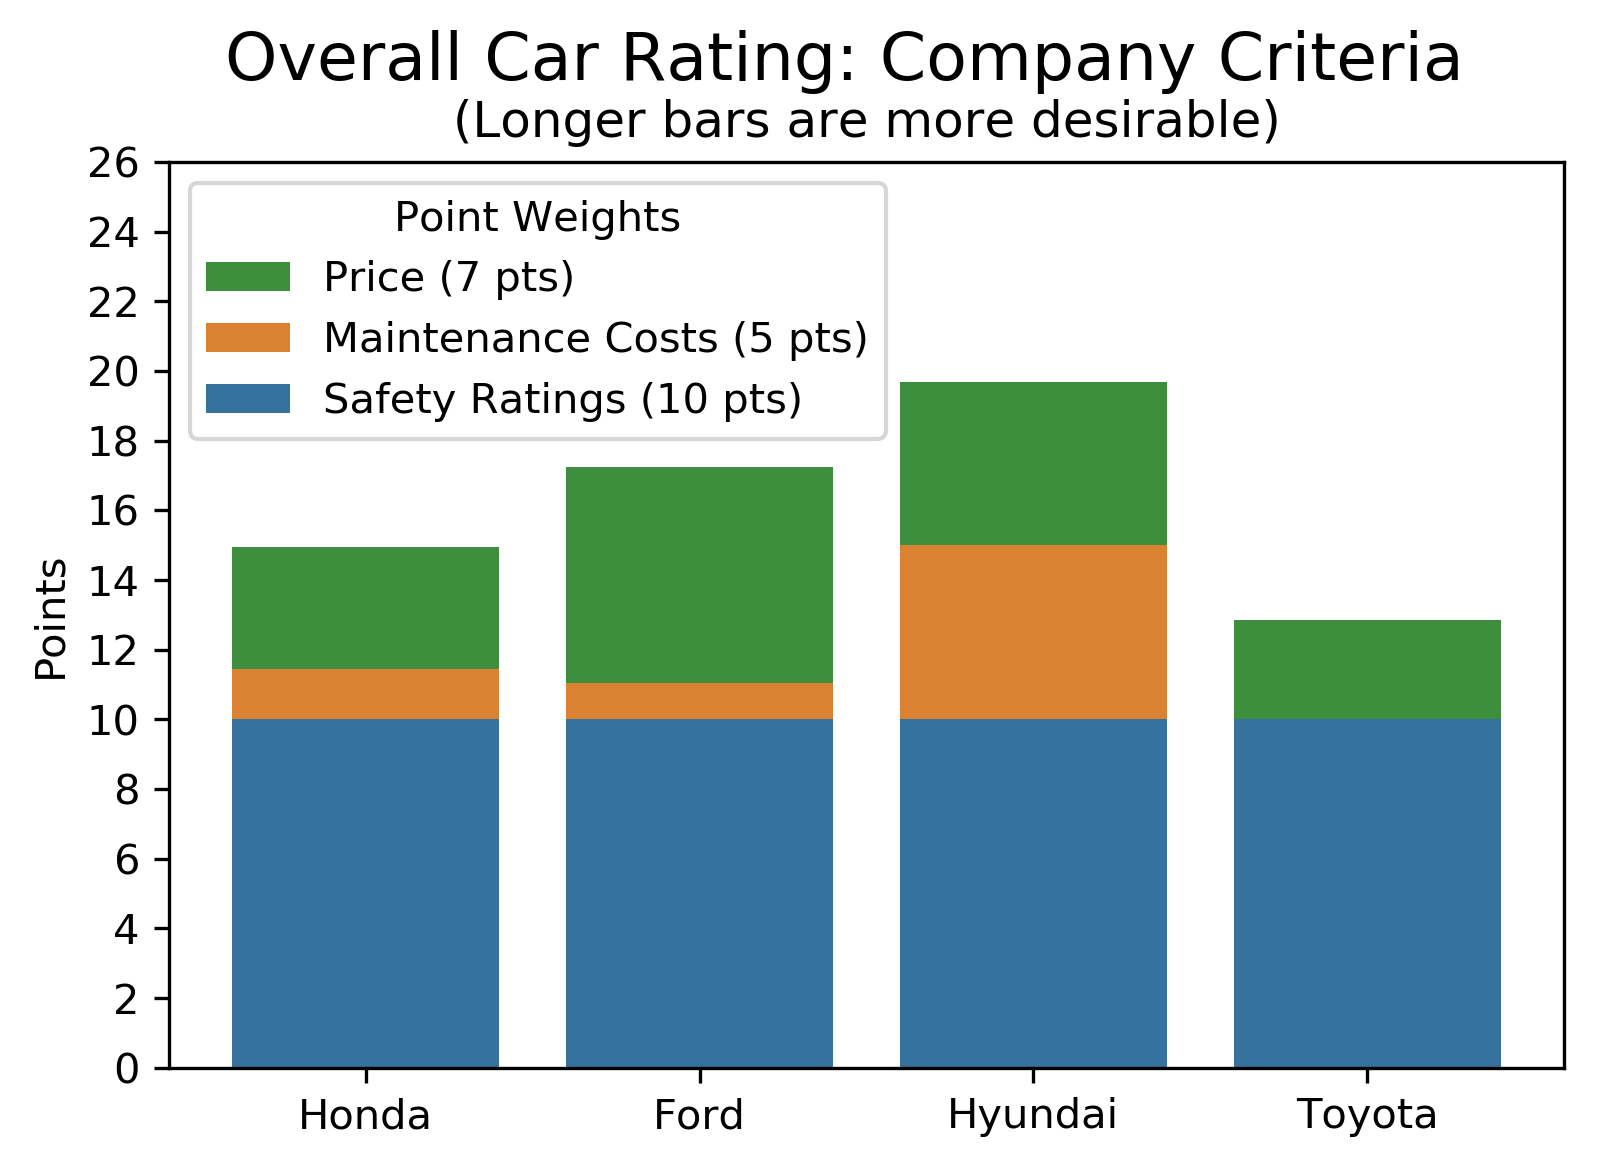

In [954]:
ind=np.arange(4)
width=.25

cols=df_car_ratings.columns

order=['safety_rating',
       'maintenance_rating',
       'price_rating', 
      ]
colors=sb.color_palette(desat=.7)

p1=plt.bar(ind,df_car_ratings[order[0]],color=colors[0])

bottom=df_car_ratings[order[0]]

p2=plt.bar(ind,df_car_ratings[order[1]],color=colors[1],
           bottom=bottom)

bottom=bottom+df_car_ratings[order[1]]
price_composite=(df_car_ratings['price_low_rating']+df_car_ratings['price_high_rating'])/2

p3=plt.bar(ind,price_composite,color=colors[2],
           bottom=bottom)
bottom=bottom+price_composite

plt.ylabel('Points')
plt.suptitle('Overall Car Rating: Company Criteria', size=16, y=.99)
plt.title('(Longer bars are more desirable)')
plt.xticks(ind, df_car_ratings.index)
plt.yticks(np.arange(0,28,2))
plt.legend((p1[0], 
            p2[0],
            p3[0])[::-1], ('Safety Ratings (10 pts)', 
                     'Maintenance Costs (5 pts)',
                     'Price (7 pts)')[::-1],
           title='Point Weights');

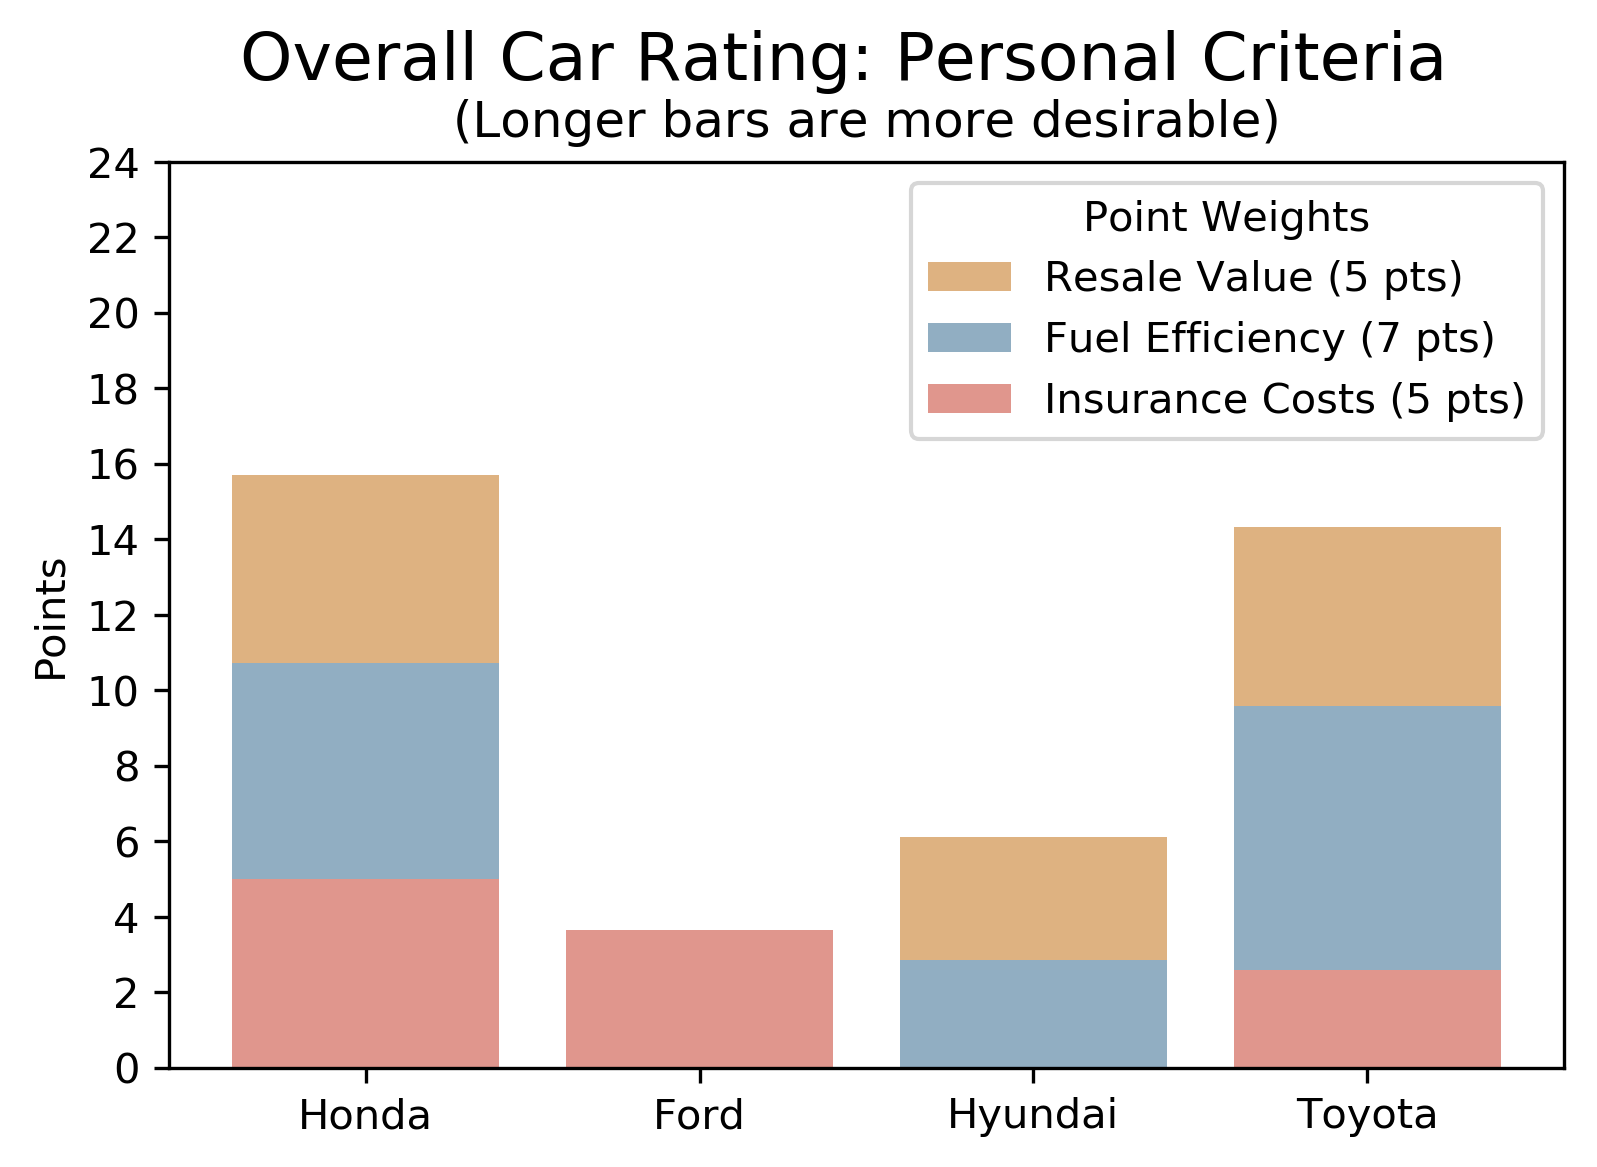

In [955]:
ind=np.arange(4)
width=.25

cols=df_car_ratings.columns

order=['insurance_rating',
       'mpg_rating',
       'depreciation5yr_rating', 
      ]

colors=sb.color_palette('Set3',desat=.6)

p4=plt.bar(ind,df_car_ratings[order[0]],color=colors[3])

bottom=df_car_ratings[order[0]]

p5=plt.bar(ind,df_car_ratings[order[1]],color=colors[4],
           bottom=bottom)

bottom=bottom+df_car_ratings[order[1]]

p6=plt.bar(ind,df_car_ratings[order[2]],color=colors[5],
           bottom=bottom)
bottom=bottom+price_composite

plt.ylabel('Points')
plt.suptitle('Overall Car Rating: Personal Criteria', size=16, y=.99)
plt.title('(Longer bars are more desirable)')
plt.xticks(ind, df_car_ratings.index)
plt.yticks(np.arange(0,26,2))
plt.legend((p4[0], p5[0], p6[0])[::-1], ('Insurance Costs (5 pts)', 
                                   'Fuel Efficiency (7 pts)',
                                   'Resale Value (5 pts)')[::-1],title='Point Weights');

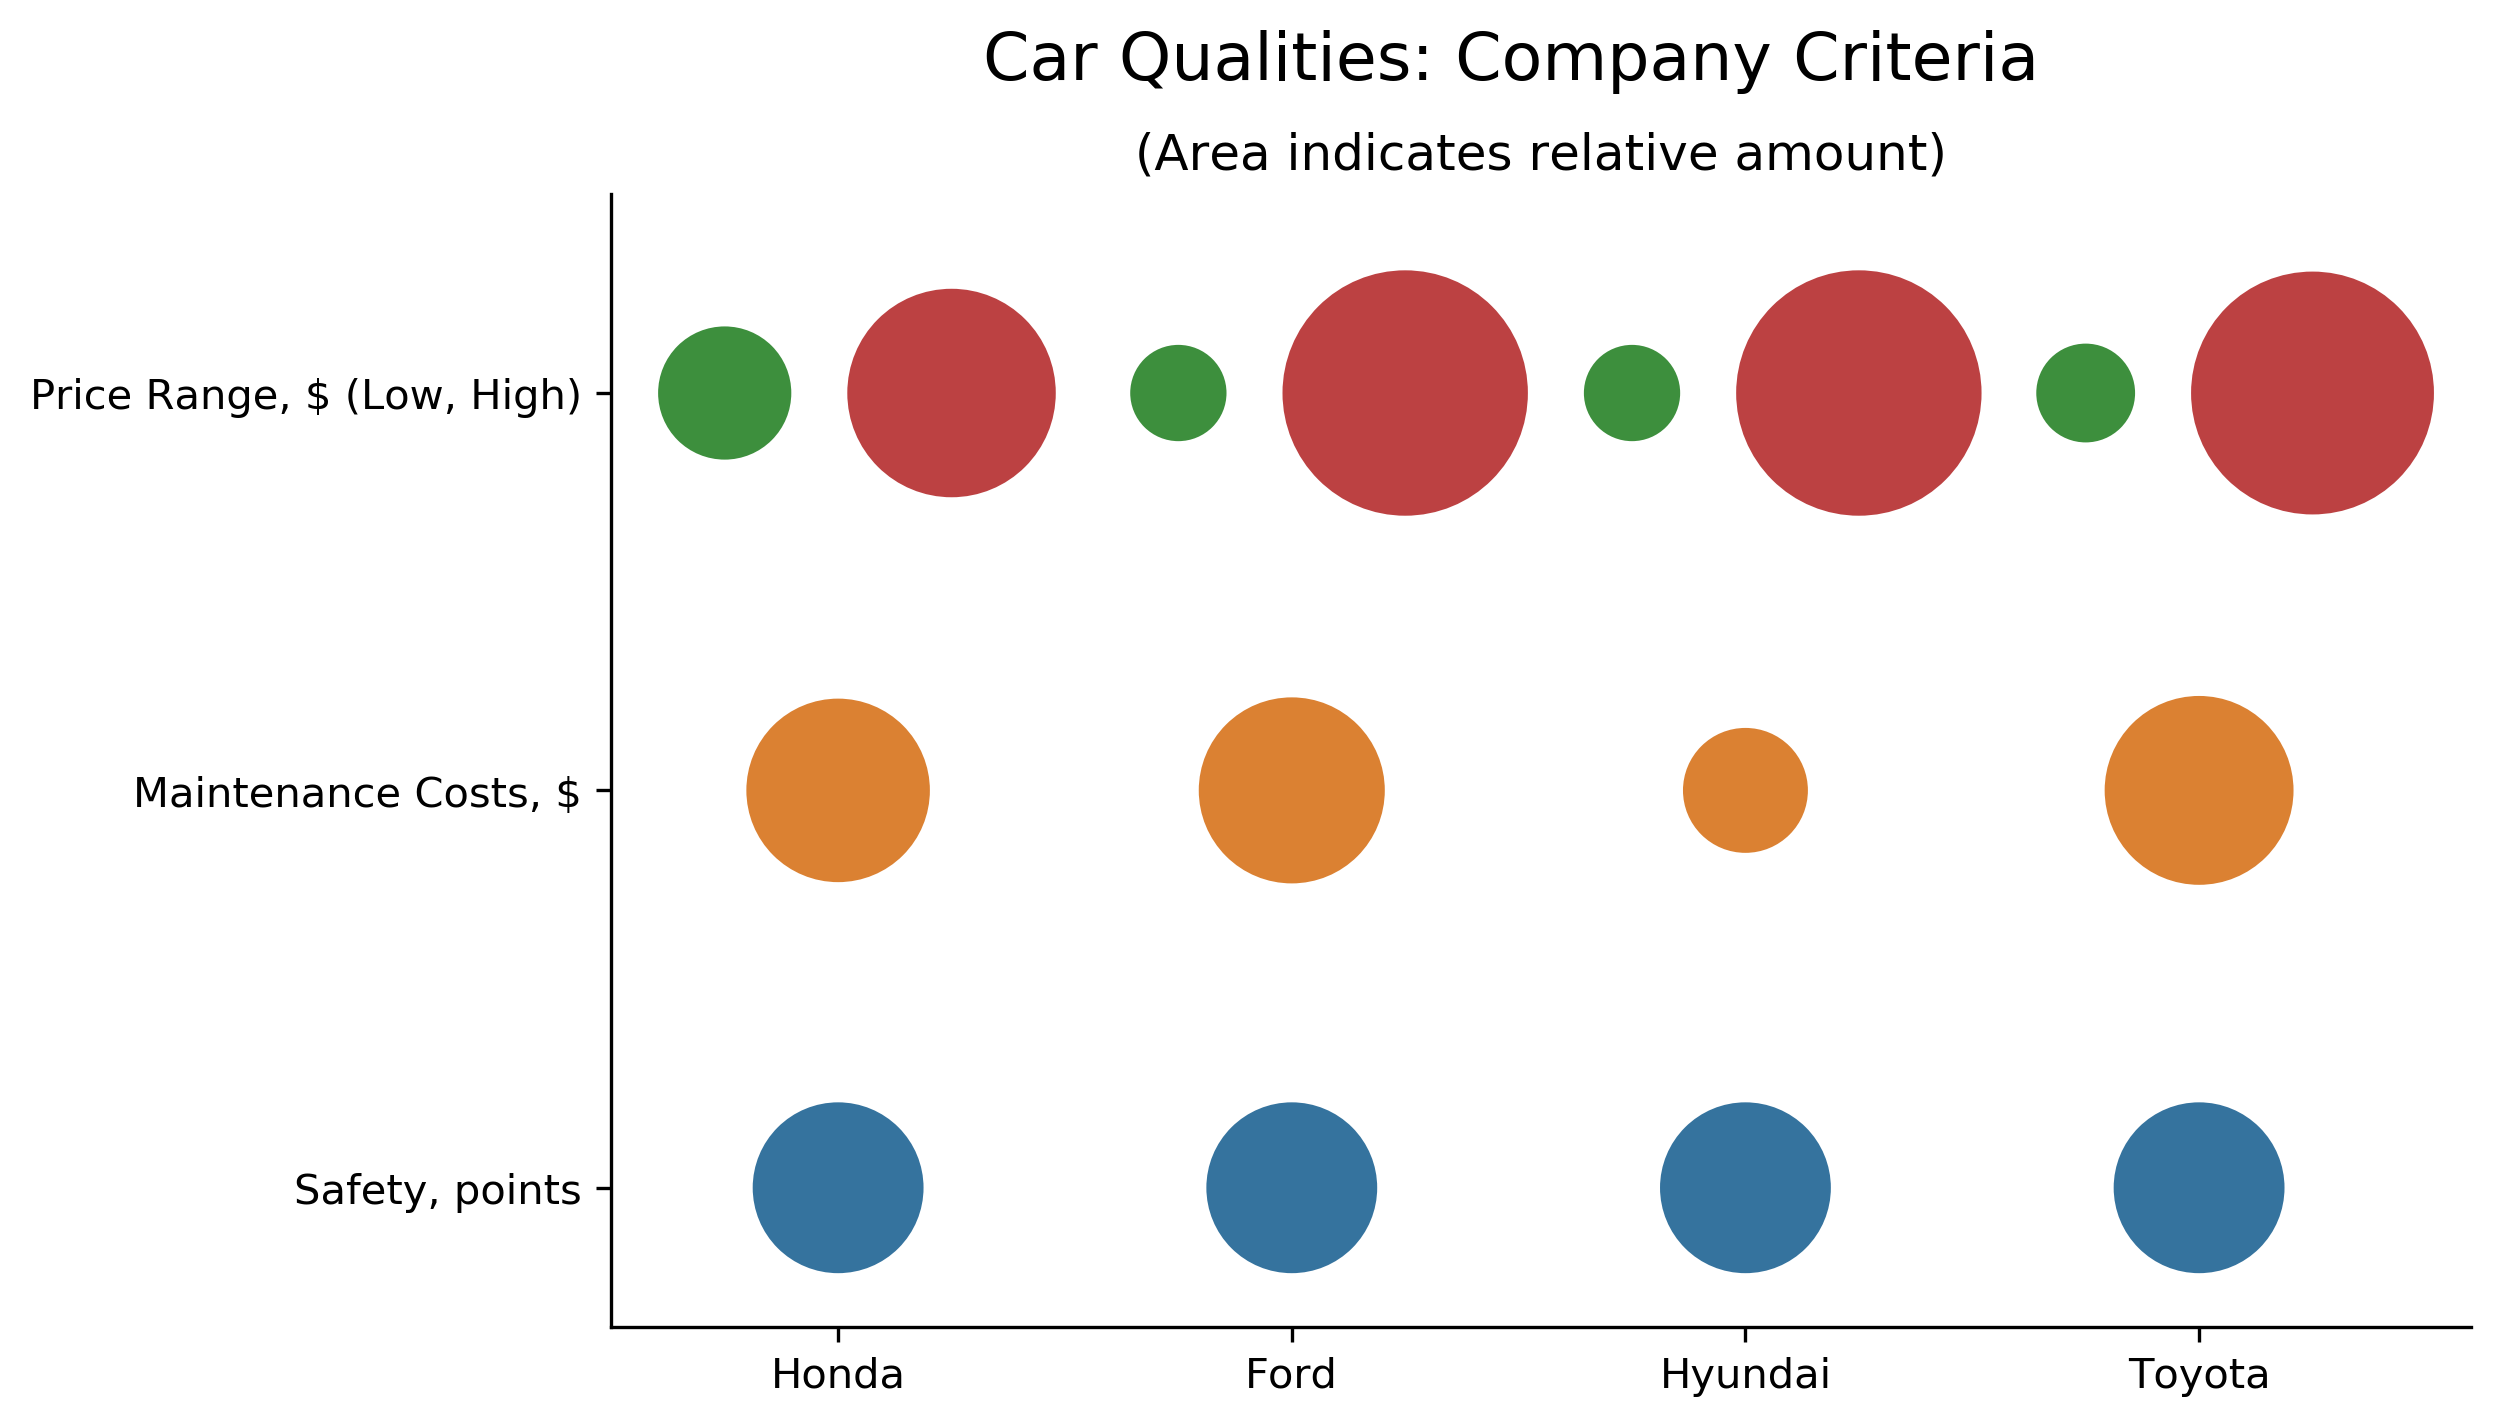

In [956]:
plt.figure(figsize=(8,5))
x=list(np.arange(4)*2)
y=list(np.arange(7))

ptsize=40
colors=sb.color_palette(desat=.7)

plt.scatter(x=x,y=[y[0]]*len(x),
            s=(((df_cars.iloc[:,4]/df_cars.iloc[:,4].mean())*ptsize)**2).to_list(),
            color=colors[0])
plt.scatter(x=x,y=[y[1]]*len(x),
            s=(((df_cars.iloc[:,6]/df_cars.iloc[:,6].mean())*ptsize)**2).to_list(),
            color=colors[1])
price_av=(df_cars.price_low+df_cars.price_high)/2
plt.scatter(x=[i-.5 for i in x],y=[y[2]]*len(x),
            s=(((df_cars.iloc[:,8]/price_av)*ptsize)**2).to_list(),
            color=colors[2])
plt.scatter(x=[i+.5 for i in x],y=[y[2]]*len(x),
            s=(((df_cars.iloc[:,10]/price_av)*ptsize)**2).to_list(),
            color=colors[3])


plt.suptitle('Car Qualities: Company Criteria', size=16, y=.99)
plt.title('(Area indicates relative amount)')
plt.xticks(x, df_car_ratings.index)
plt.yticks(y[0:3], ['Safety, points', 'Maintenance Costs, $', 'Price Range, $ (Low, High)']);
plt.ylim(-.35,2.5)
plt.xlim(-1,7.2)
sb.despine()

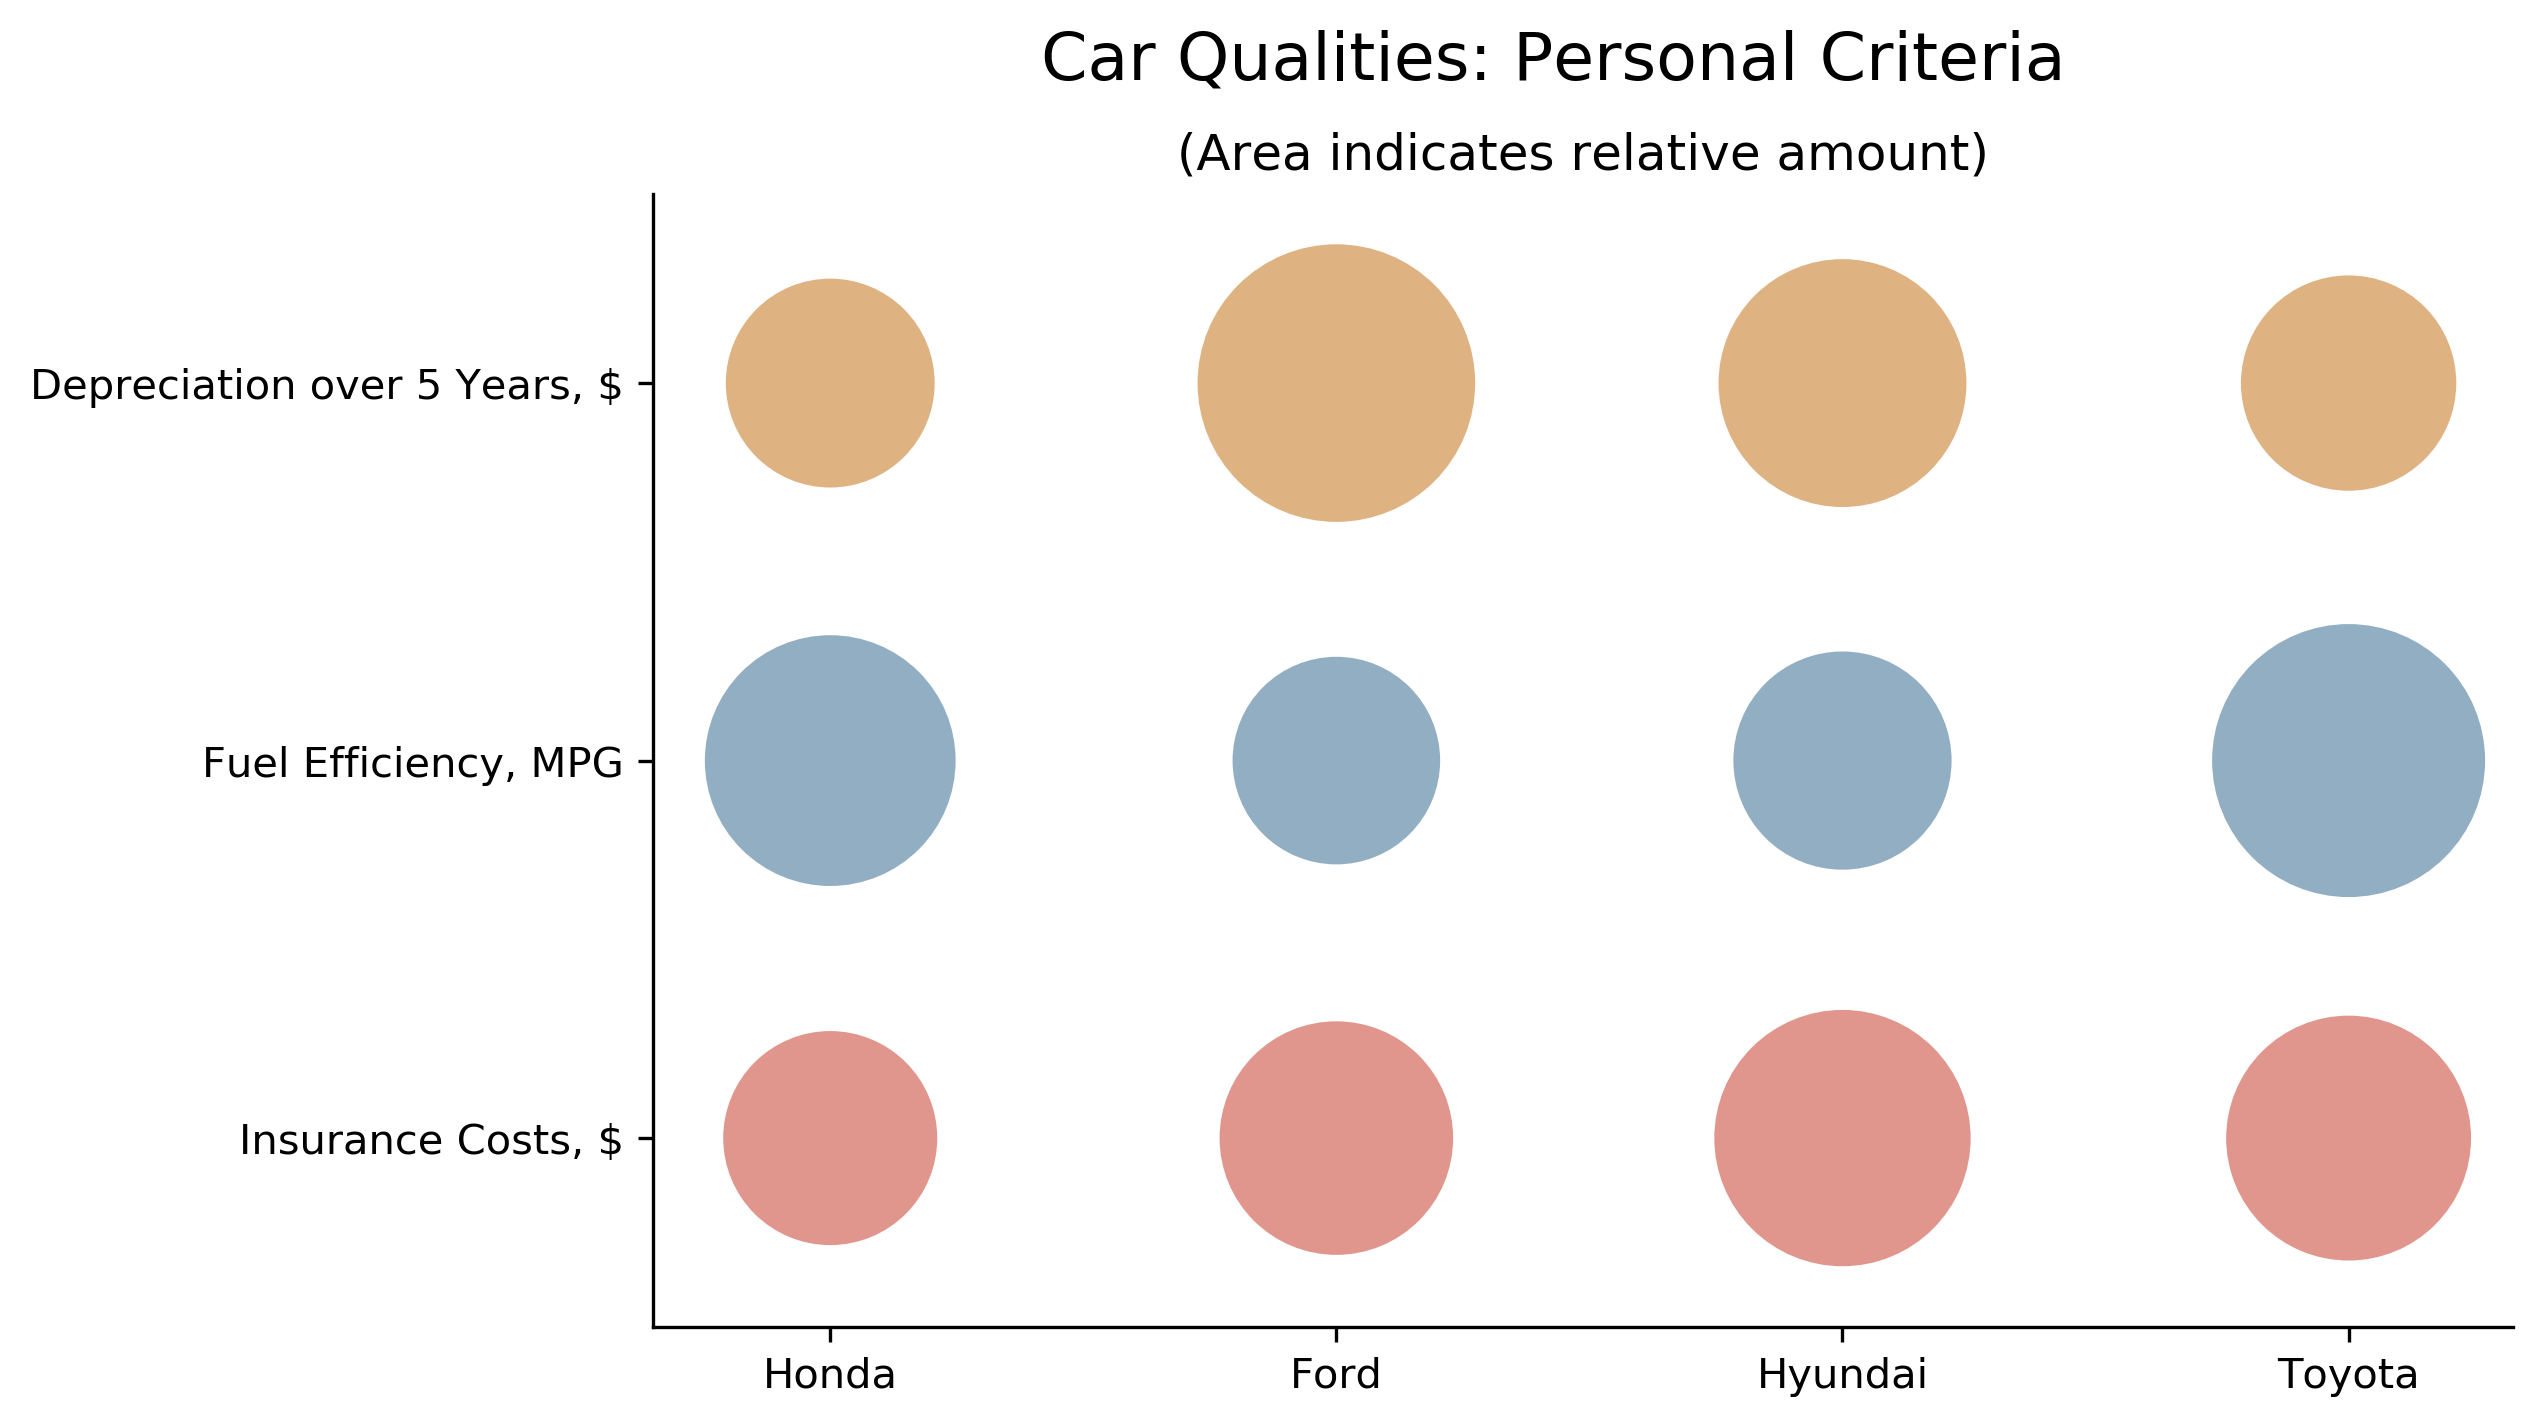

In [957]:
plt.figure(figsize=(8,5))
x=list(np.arange(4)*2)
y=list(np.arange(7))

ptsize=25
colors=sb.color_palette('Set3',desat=.6)

plt.scatter(x=x,y=[y[0]]*len(x),
            s=(((df_cars.iloc[:,12]/df_cars.iloc[:,12].mean())*ptsize)**2.5).to_list(),
            color=colors[3])
plt.scatter(x=x,y=[y[1]]*len(x),
            s=(((df_cars.iloc[:,14]/df_cars.iloc[:,14].mean())*ptsize)**2.5).to_list(),
            color=colors[4])
plt.scatter(x=x,y=[y[2]]*len(x),
            s=(((df_cars.iloc[:,16]/df_cars.iloc[:,16].mean())*ptsize)**2.5).to_list(),
            color=colors[5])


plt.suptitle('Car Qualities: Personal Criteria', size=16, y=.99)
plt.title('(Area indicates relative amount)')
plt.xticks(x, df_car_ratings.index)
plt.yticks(y[0:3], ['Insurance Costs, $', 'Fuel Efficiency, MPG', 'Depreciation over 5 Years, $']);
plt.ylim(-.5,2.5)
plt.xlim(-.7,6.65)
sb.despine()


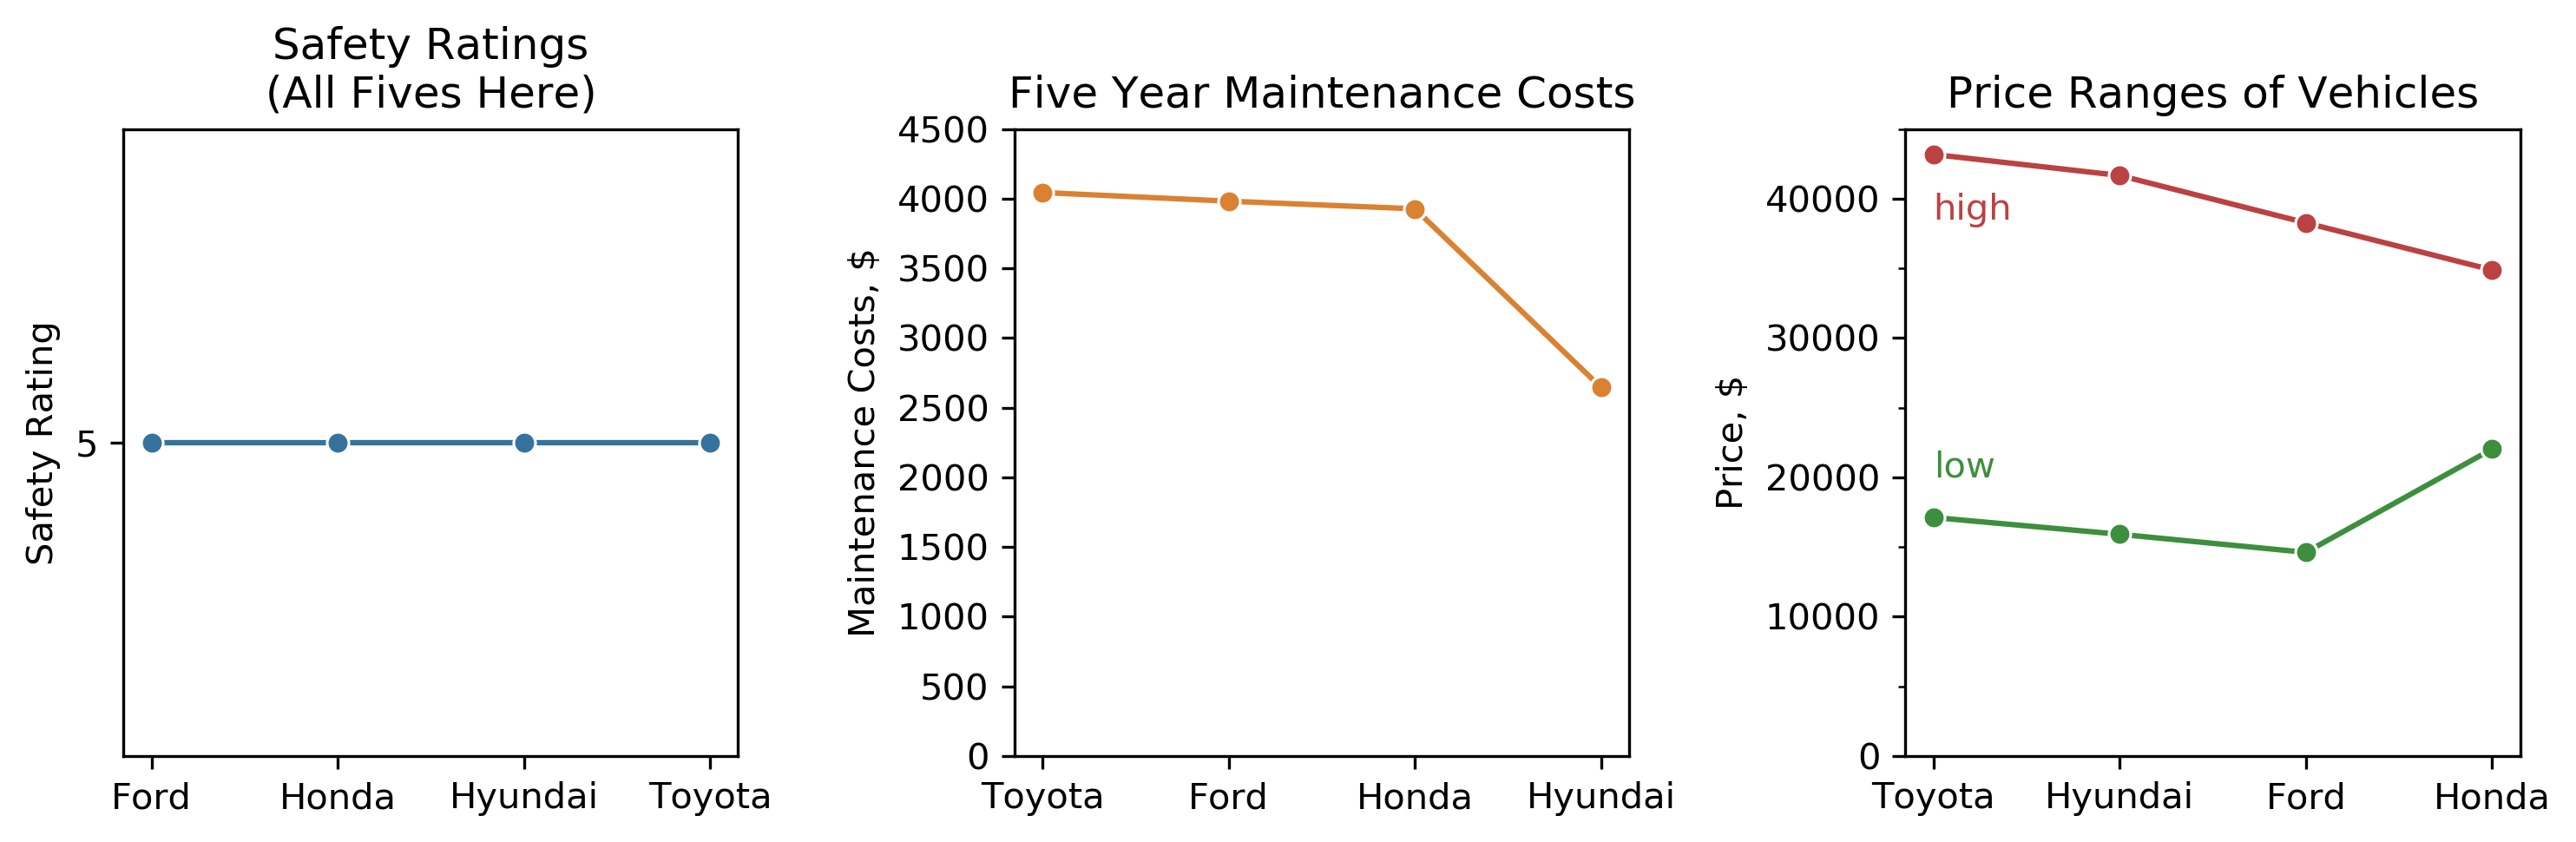

In [958]:
colors=sb.color_palette(desat=.7)

fig=plt.figure(figsize=(10,10/3))
ax=fig.add_subplot(1,3,1)
ax=sb.lineplot(x='make',y='safety',data=df_cars.sort_values('safety', ascending=False),
               style='safety',markers=True, dashes=False, color=colors[0])
ax.set_yticks([5.0])
ax.get_legend().remove()
ax.set_ylabel('Safety Rating')
ax.set_xlabel('')
ax.set_title("Safety Ratings\n(All Fives Here)");

ax=fig.add_subplot(1,3,2)
ax=sb.lineplot(x='make',y='maintenance',data=df_cars.sort_values('maintenance',ascending=False),
               sort=False, marker='o', dashes=False, color=colors[1])
ax.set_yticks(np.arange(0,5000,500))
#ax.get_legend().remove()
ax.set_ylabel('Maintenance Costs, $')
ax.set_xlabel('')
ax.set_title("Five Year Maintenance Costs");

ax=fig.add_subplot(1,3,3)
ax=sb.lineplot(x='make',y='price_high',data=df_cars.sort_values('price_high',ascending=False),
               sort=False, marker='o', dashes=False, color=colors[3])
sb.lineplot(x='make',y='price_low',ax=ax,data=df_cars.sort_values('price_high',ascending=False),
               sort=False, marker='o', dashes=False, color=colors[2])

ax.set_yticks(np.arange(0,50000,10000))
ax.set_yticks(np.arange(0,50000,5000),minor=True)
#ax.get_legend().remove()
ax.set_ylabel('Price, $')
ax.set_xlabel('')
ax.set_title("Price Ranges of Vehicles");
ax.text(x=0,y=38500,s='high',fontdict={'color':colors[3]})
ax.text(x=0,y=20000,s='low',fontdict={'color':colors[2]})

plt.tight_layout()



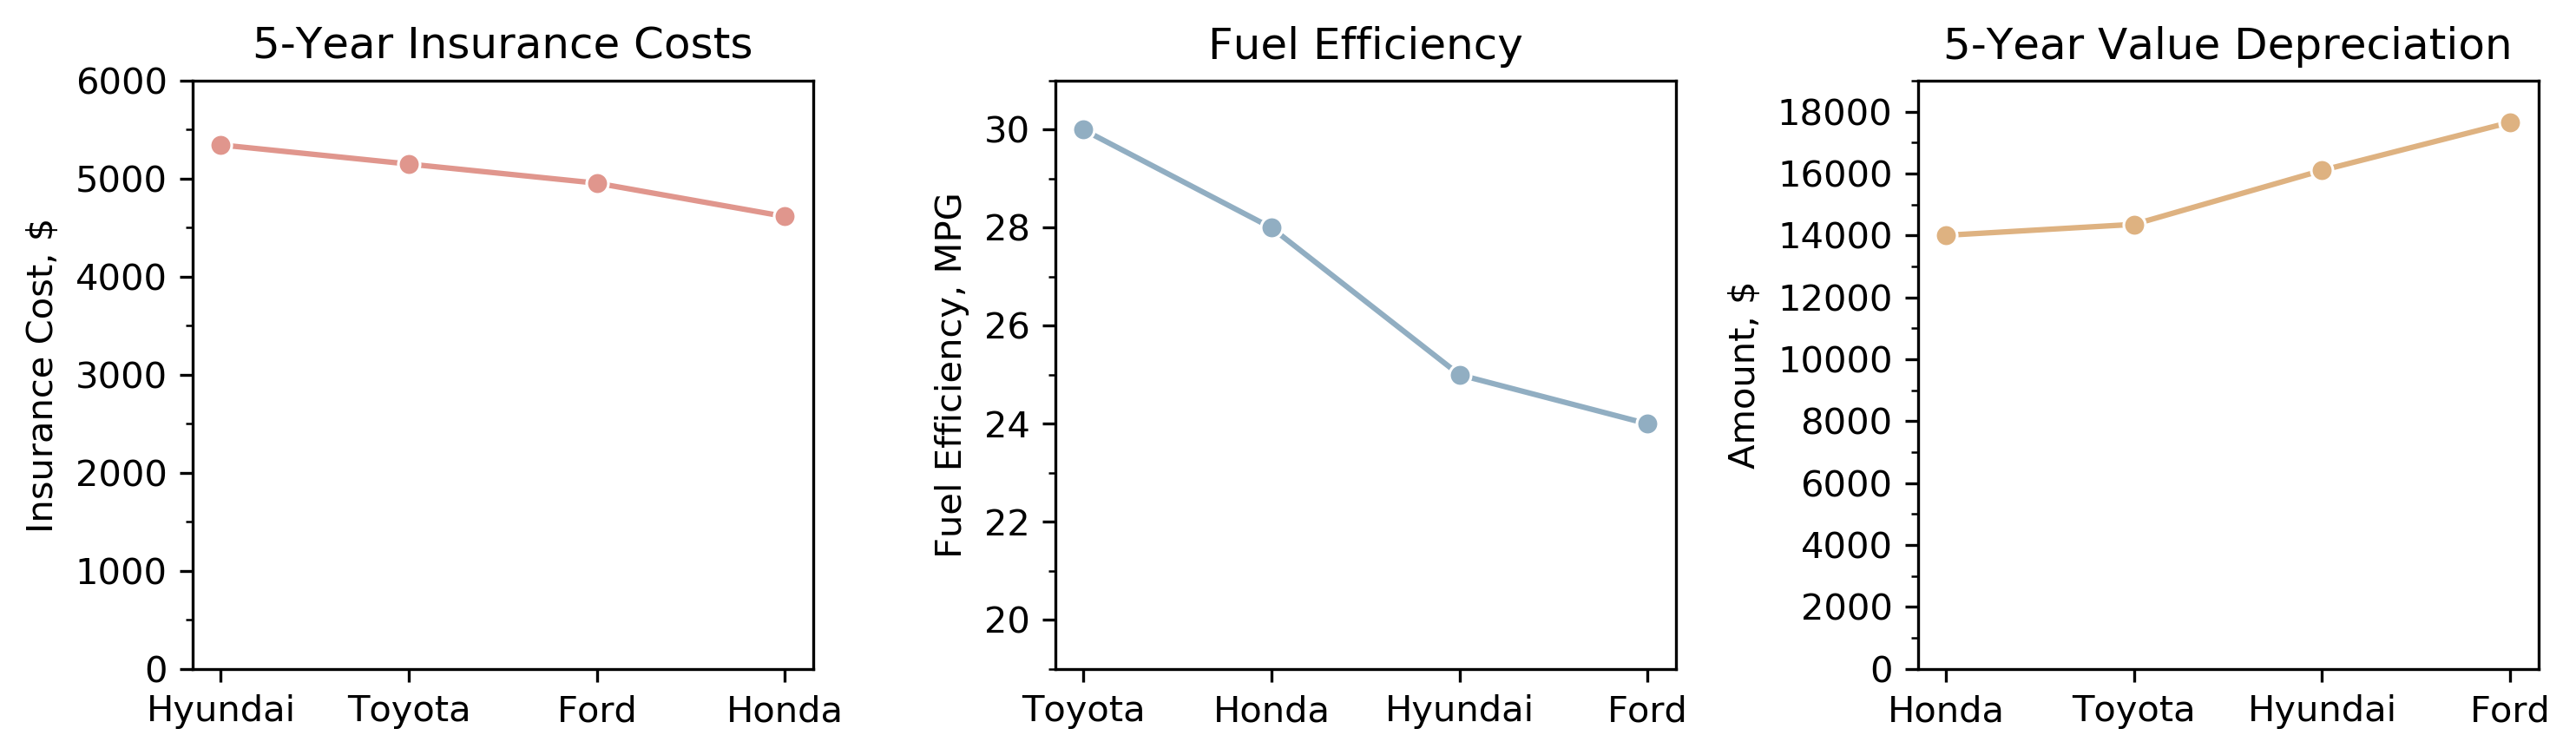

In [959]:
colors=sb.color_palette('Set3',desat=.6)

fig=plt.figure(figsize=(10,3))
ax=fig.add_subplot(1,3,1)
ax=sb.lineplot(x='make',y='insurance',data=df_cars.sort_values('insurance', ascending=False),
               sort=False,marker='o', dashes=False, color=colors[3])
ax.set_yticks(np.arange(0,6500,1000))
ax.set_yticks(np.arange(0,6500,500),minor=True)
#ax.get_legend().remove()
ax.set_ylabel('Insurance Cost, $')
ax.set_xlabel('')
ax.set_title("5-Year Insurance Costs");

ax=fig.add_subplot(1,3,2)
ax=sb.lineplot(x='make',y='mpg',data=df_cars.sort_values('mpg',ascending=False),
               sort=False, marker='o', dashes=False, color=colors[4])
ax.set_yticks(np.arange(20,32,2))
ax.set_yticks(np.arange(19,32,1),minor=True)

#ax.get_legend().remove()
ax.set_ylabel('Fuel Efficiency, MPG')
ax.set_xlabel('')
ax.set_title("Fuel Efficiency");

ax=fig.add_subplot(1,3,3)
ax=sb.lineplot(x='make',y='depreciation5yr',data=df_cars.sort_values('depreciation5yr',ascending=True),
               sort=False, marker='o', dashes=False, color=colors[5])

ax.set_yticks(np.arange(0,19000,2000))
ax.set_yticks(np.arange(0,20000,1000),minor=True)
#ax.get_legend().remove()
ax.set_ylabel('Amount, $')
ax.set_xlabel('')
ax.set_title("5-Year Value Depreciation");

plt.tight_layout()



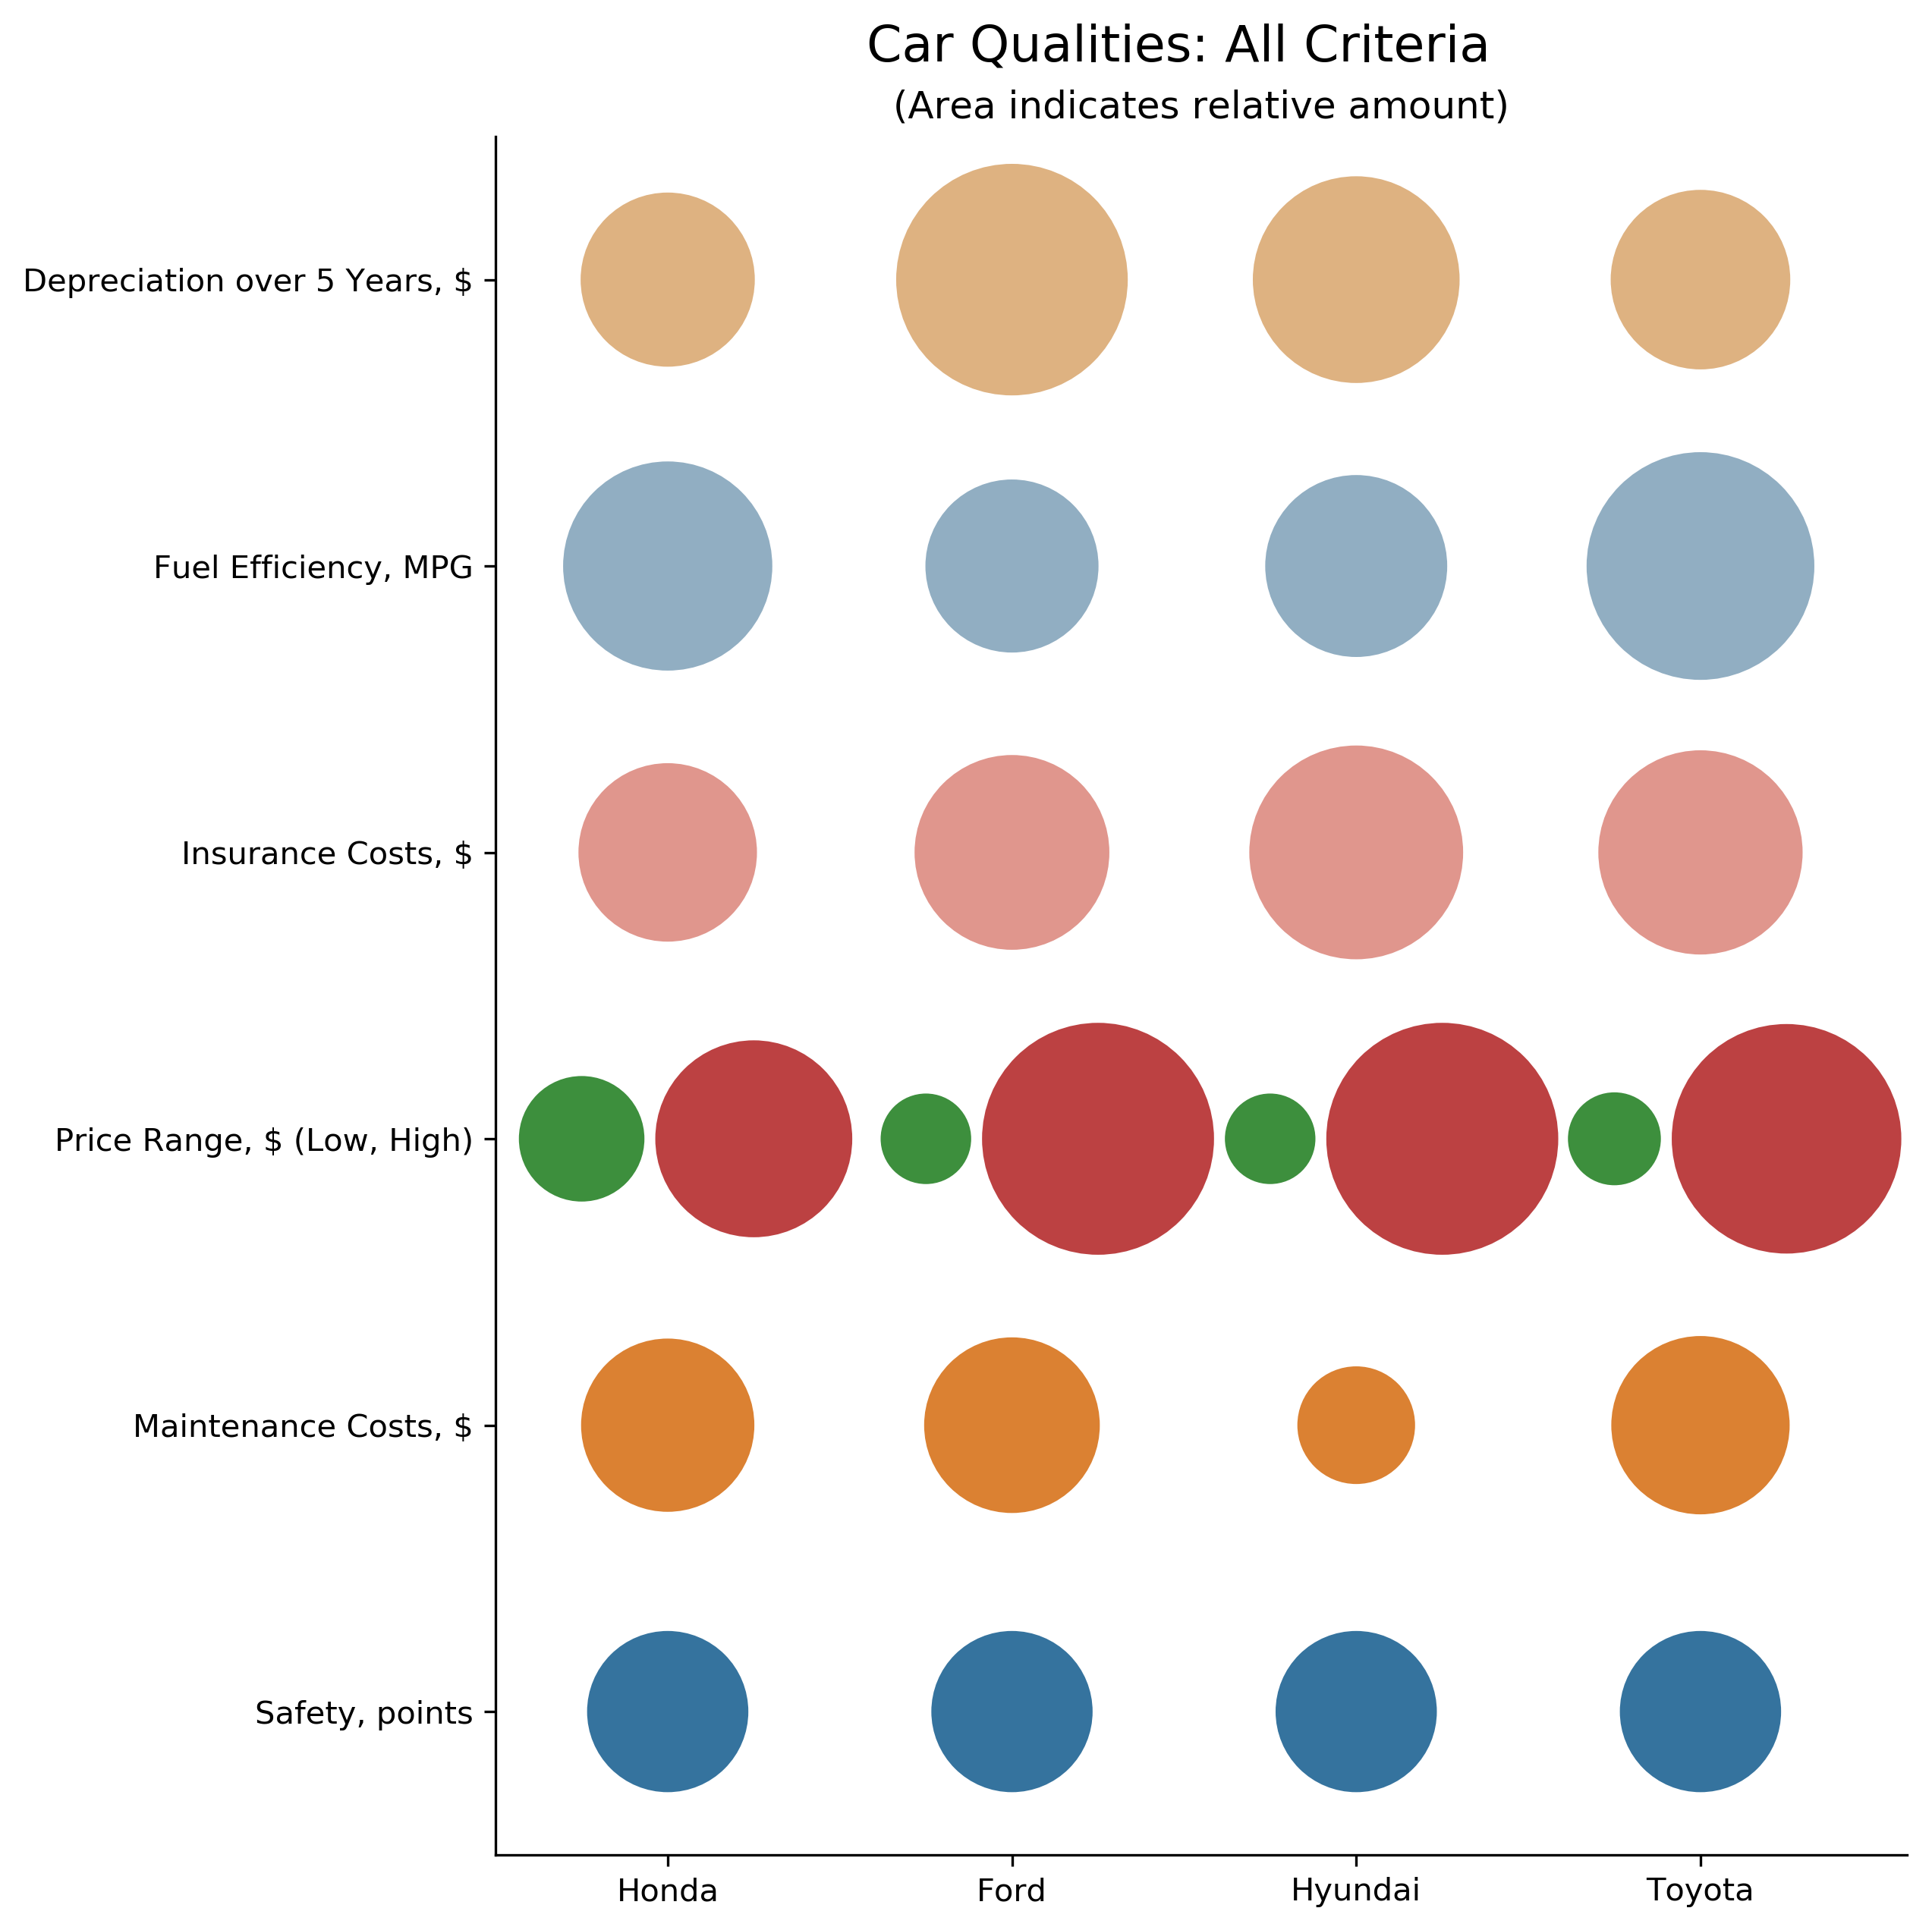

In [960]:
plt.figure(figsize=(8,10))
x=list(np.arange(4)*2)
y=list(np.arange(7))

ptsize=50
colors=sb.color_palette(desat=.7)

plt.scatter(x=x,y=[y[0]]*len(x),
            s=(((df_cars.iloc[:,4]/df_cars.iloc[:,4].mean())*ptsize)**2).to_list(),
            color=colors[0])
plt.scatter(x=x,y=[y[1]]*len(x),
            s=(((df_cars.iloc[:,6]/df_cars.iloc[:,6].mean())*ptsize)**2).to_list(),
            color=colors[1])
price_av=(df_cars.price_low+df_cars.price_high)/2
plt.scatter(x=[i-.5 for i in x],y=[y[2]]*len(x),
            s=(((df_cars.iloc[:,8]/price_av)*ptsize)**2).to_list(),
            color=colors[2])
plt.scatter(x=[i+.5 for i in x],y=[y[2]]*len(x),
            s=(((df_cars.iloc[:,10]/price_av)*ptsize)**2).to_list(),
            color=colors[3])

colors=sb.color_palette('Set3',desat=.6)
ptsize=27

plt.scatter(x=x,y=[y[3]]*len(x),
            s=(((df_cars.iloc[:,12]/df_cars.iloc[:,12].mean())*ptsize)**2.5).to_list(),
            color=colors[3])
plt.scatter(x=x,y=[y[4]]*len(x),
            s=(((df_cars.iloc[:,14]/df_cars.iloc[:,14].mean())*ptsize)**2.5).to_list(),
            color=colors[4])
plt.scatter(x=x,y=[y[5]]*len(x),
            s=(((df_cars.iloc[:,16]/df_cars.iloc[:,16].mean())*ptsize)**2.5).to_list(),
            color=colors[5])


plt.suptitle('Car Qualities: All Criteria', size=16,y=.93)
plt.title('(Area indicates relative amount)')
plt.xticks(x, df_car_ratings.index)
plt.yticks(y[0:6], ['Safety, points', 'Maintenance Costs, $', 'Price Range, $ (Low, High)',
                    'Insurance Costs, $', 'Fuel Efficiency, MPG', 'Depreciation over 5 Years, $']);
plt.ylim(-.5,5.5)
plt.xlim(-1,7.2)
sb.despine()


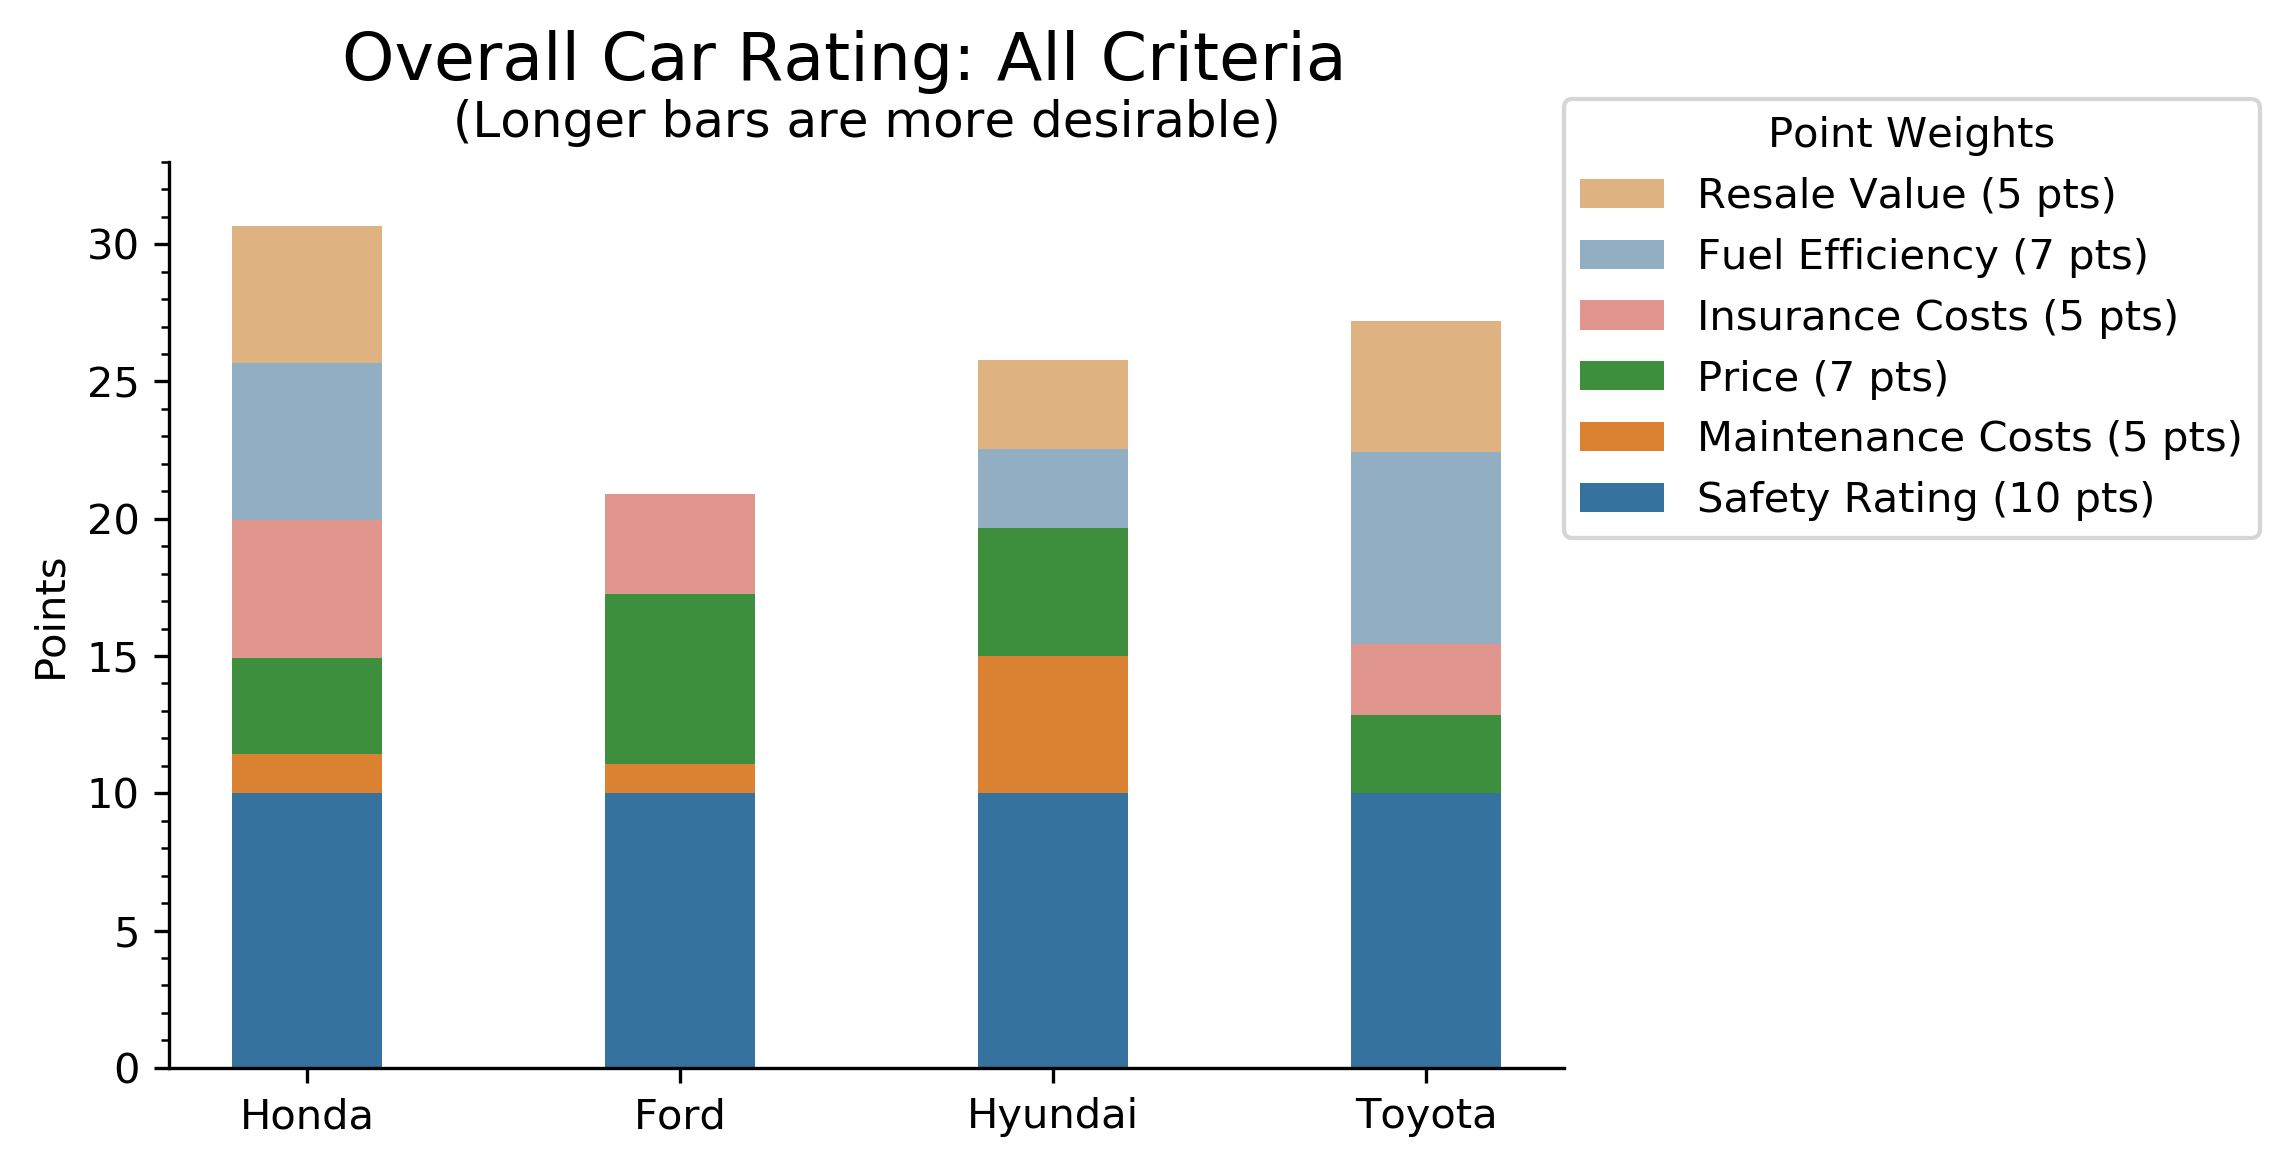

In [961]:
ind=np.arange(4)
width=.4
fig=plt.figure()
cols=df_car_ratings.columns

order=['safety_rating',
       'maintenance_rating',
       'price_rating', 
      ]
colors=sb.color_palette(desat=.7)

p1=plt.bar(ind,df_car_ratings[order[0]],color=colors[0],
           width=width)

bottom=df_car_ratings[order[0]]

p2=plt.bar(ind,df_car_ratings[order[1]],color=colors[1],
           bottom=bottom,width=width)

bottom=bottom+df_car_ratings[order[1]]
price_composite=(df_car_ratings['price_low_rating']+df_car_ratings['price_high_rating'])/2

p3=plt.bar(ind,price_composite,color=colors[2],
           bottom=bottom,width=width)
bottom=bottom+price_composite

cols=df_car_ratings.columns

order=['insurance_rating',
       'mpg_rating',
       'depreciation5yr_rating', 
      ]

colors=sb.color_palette('Set3',desat=.6)

p4=plt.bar(ind,df_car_ratings[order[0]],color=colors[3],
           bottom=bottom,width=width)

bottom+=df_car_ratings[order[0]]

p5=plt.bar(ind,df_car_ratings[order[1]],color=colors[4],
           bottom=bottom,width=width)

bottom+=df_car_ratings[order[1]]

p6=plt.bar(ind,df_car_ratings[order[2]],color=colors[5],
           bottom=bottom,width=width)
bottom+=price_composite
ax=fig.axes[0]
plt.ylabel('Points')
plt.suptitle('Overall Car Rating: All Criteria', size=16, y=.99)
plt.title('(Longer bars are more desirable)')
plt.xticks(ind, df_car_ratings.index)
plt.yticks(np.arange(0,35,5))
ax.set_yticks(np.arange(0,34,1), minor=True)


plt.legend((p1[0],p2[0],p3[0],p4[0], p5[0], p6[0])[::-1], 
           ('Safety Rating (10 pts)', 'Maintenance Costs (5 pts)',
            'Price (7 pts)','Insurance Costs (5 pts)', 
            'Fuel Efficiency (7 pts)','Resale Value (5 pts)')[::-1],
            loc=(.9999,.585),title='Point Weights');
sb.despine()

In [962]:

df_car_ratings['price_rating']=(df_car_ratings.price_high_rating+df_car_ratings.price_low_rating)/2
tidy=df_car_ratings.drop(['model','best'],axis=1).melt(id_vars='make')

In [963]:
myvars=['safety_rating',
'maintenance_rating',
'price_rating',
'insurance_rating',
'mpg_rating',
'depreciation5yr_rating']

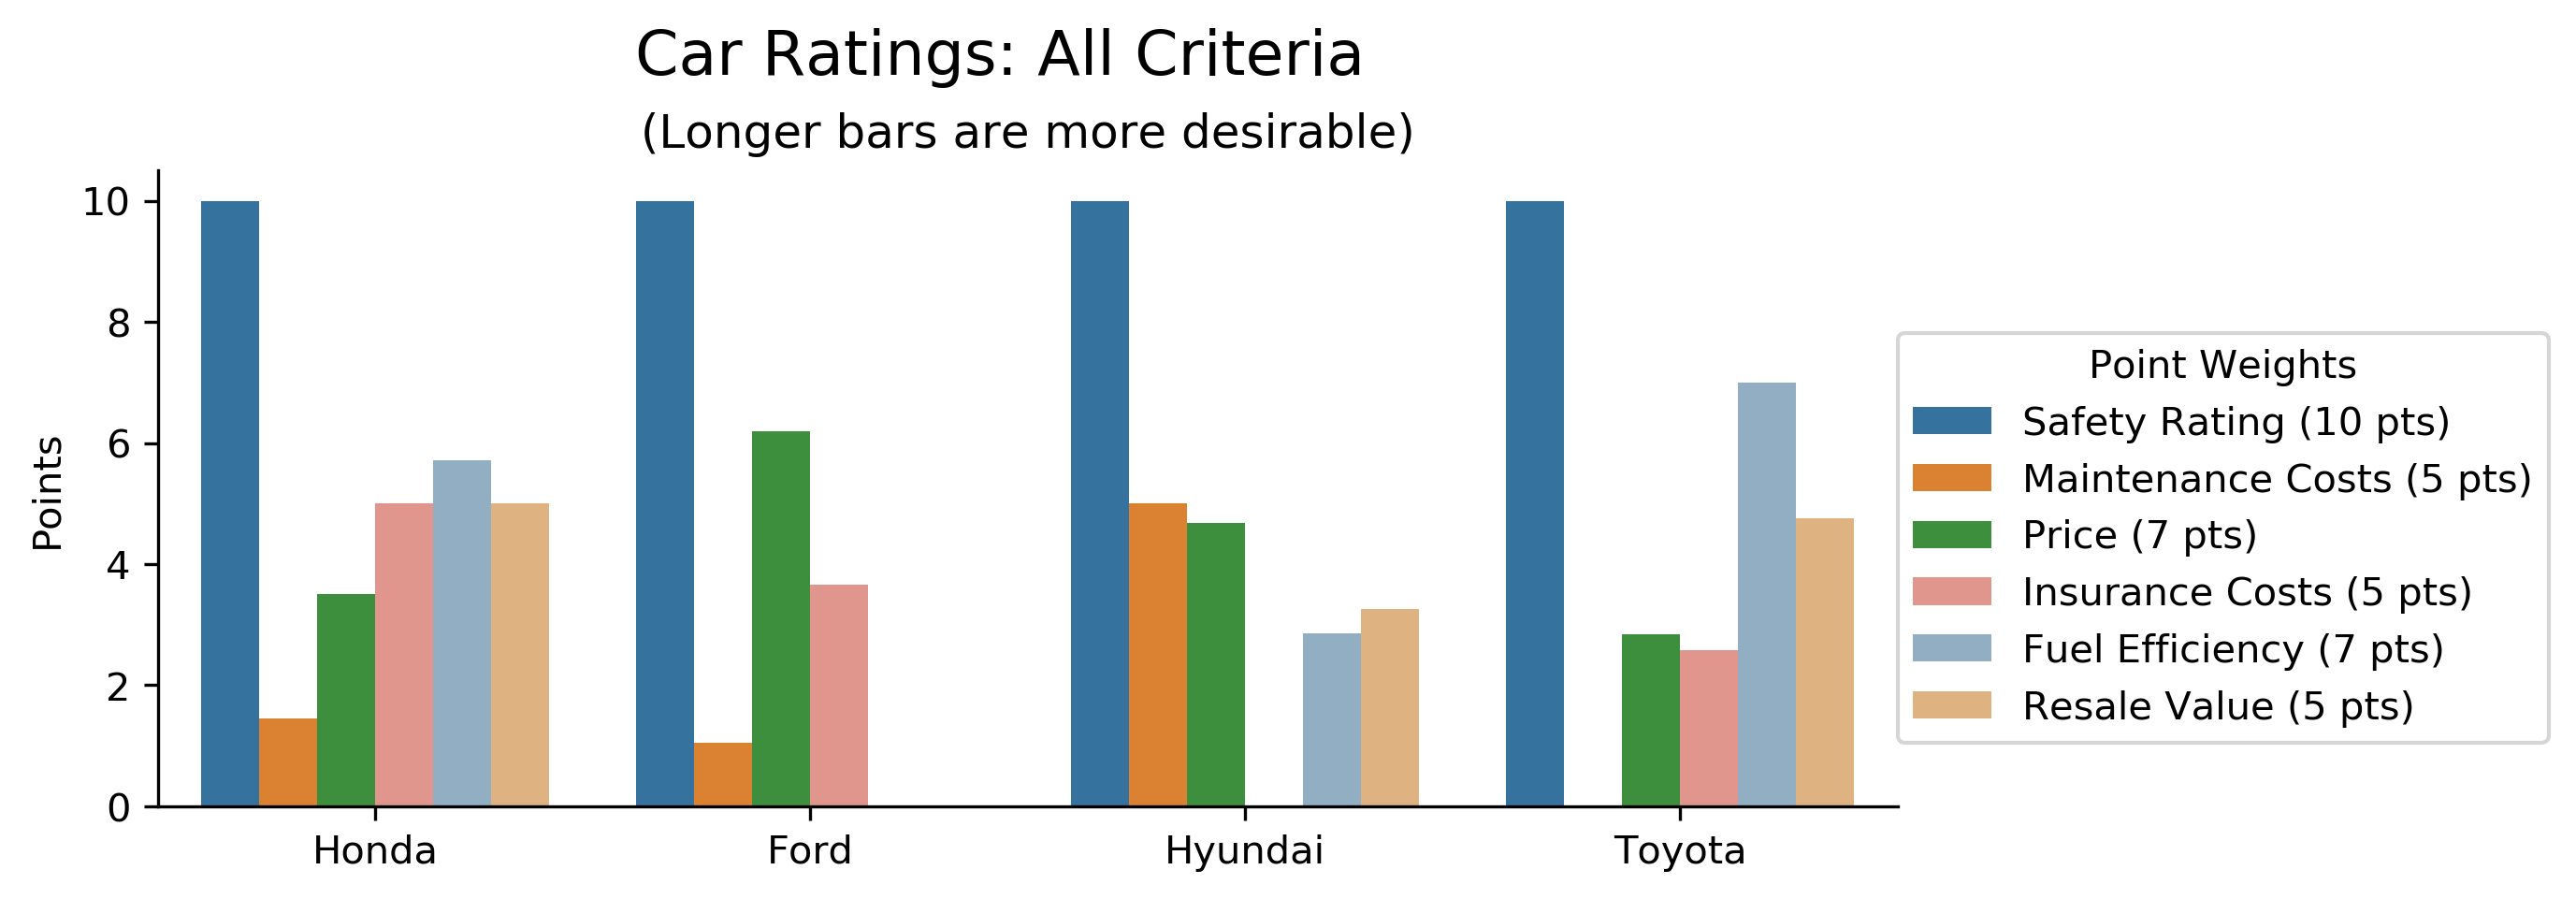

In [964]:
plt.figure(figsize=(8,3))
colors=(sb.color_palette(desat=.7)[0:3]+sb.color_palette('Set3',desat=.6)[3:6])

sb.barplot(data=tidy, x='make', y='value', hue='variable', hue_order=myvars, palette=colors, saturation=1)

plt.legend((p1[0],p2[0],p3[0],p4[0], p5[0], p6[0]), 
           ('Safety Rating (10 pts)', 'Maintenance Costs (5 pts)',
            'Price (7 pts)','Insurance Costs (5 pts)', 
            'Fuel Efficiency (7 pts)','Resale Value (5 pts)'),
            loc=(.9999,.1),title='Point Weights');

plt.suptitle('Car Ratings: All Criteria', size=16, y=1.05)
plt.ylabel('Points')
plt.xlabel('')
plt.title('(Longer bars are more desirable)')
sb.despine()

In [965]:
trans=df_car_ratings.drop(['make','model','price_low_rating','price_high_rating','best'],axis=1)[['safety_rating',
                                                                                                  'maintenance_rating',
                                                                                                  'price_rating',
                                                                                                  'insurance_rating',
                                                                                                  'mpg_rating',
                                                                                                  'depreciation5yr_rating']].T

In [966]:
trans['weights']=pd.Series([10,5,7,5,7,5],trans.index)

In [967]:
trans

,Honda,Ford,Hyundai,Toyota,weights
safety_rating,10,10,10,10,10
maintenance_rating,1.44544,1.05221,5,0,5
price_rating,3.5,6.19273,4.67277,2.84828,7
insurance_rating,5,3.65461,0,2.5842,5
mpg_rating,5.71548,0,2.85774,7,7
depreciation5yr_rating,5,0,3.26039,4.75207,5


In [968]:
for col in trans.columns[:-1]:
    trans[col]=trans[col]/trans.weights

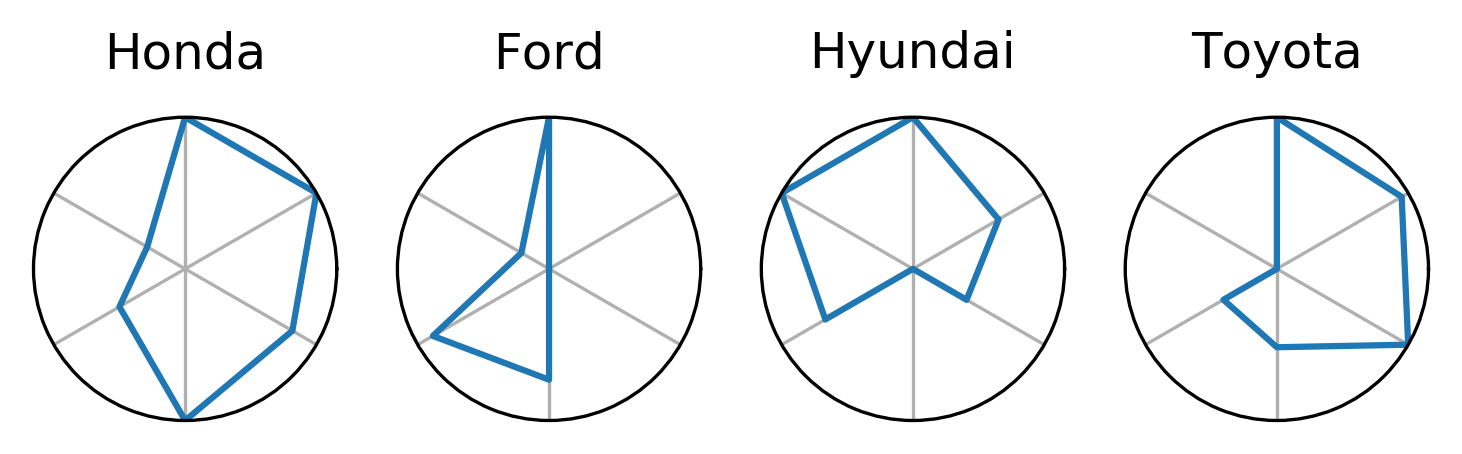

In [973]:

for i,car in enumerate(trans.columns[:-1]):
    r = list(trans[car].values)+[1]
    theta = np.arange(np.pi/2,16*np.pi/6,np.pi/3)

    ax = plt.subplot(1,4,i+1, projection='polar')
    ax.plot(theta, r)
    ax.set_rmax(1)
    ax.set_thetagrids(np.arange(30, 360, 60),[])
    ax.set_rticks([])  # Less radial ticks
    ax.grid(b=False, which='both', axis='y')

    ax.set_title(car, va='bottom')


Text(0.5, 1.2, 'Key')

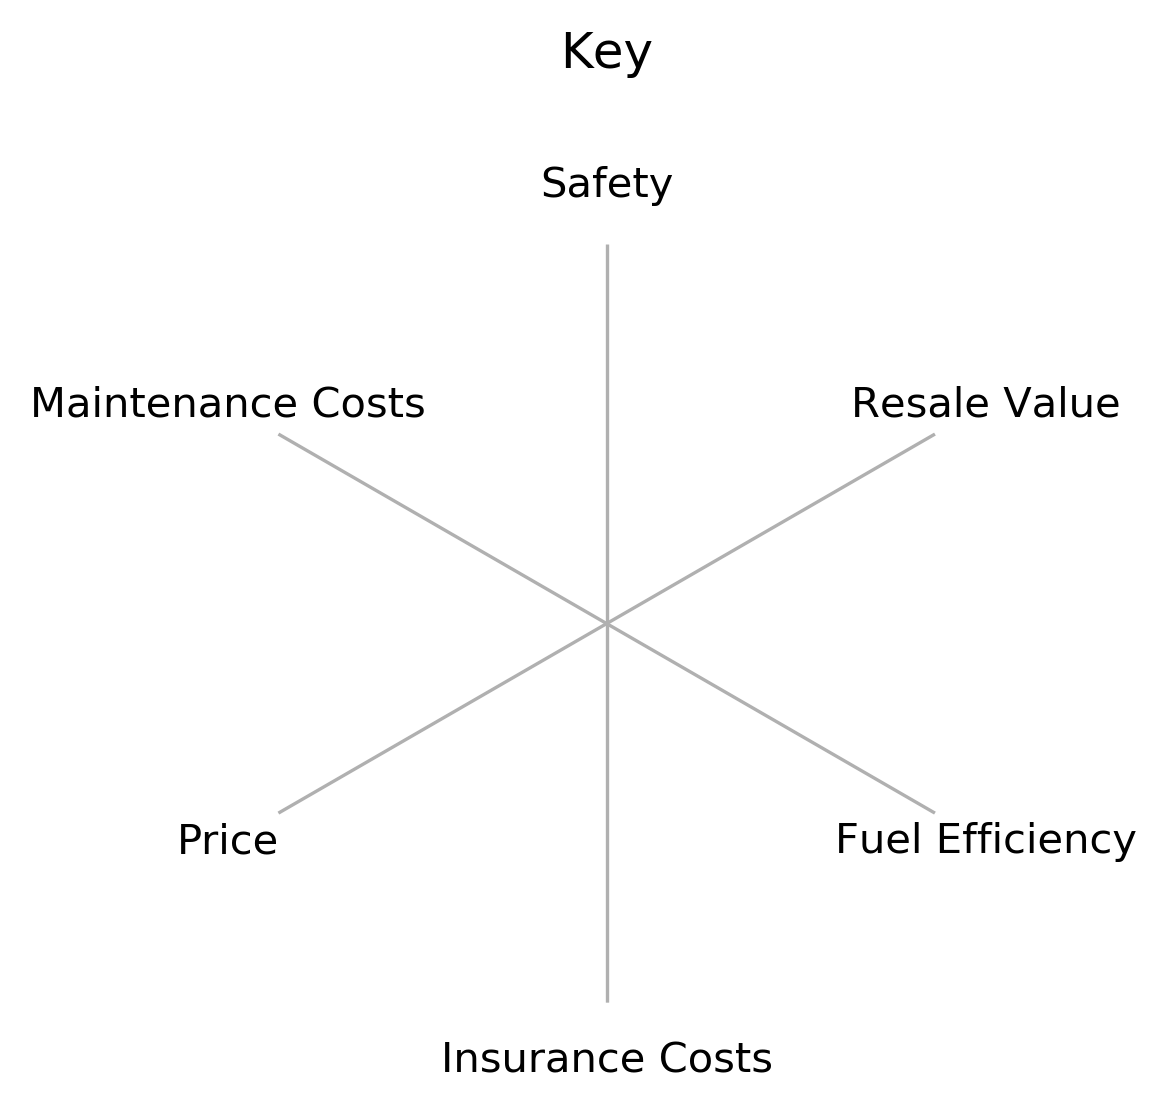

In [971]:
'''r = [1]*7
theta = np.arange(np.pi/2,16*np.pi/6,np.pi/3)
'''
plt.figure(figsize=(15,15))
ax = plt.subplot(1,4,i+1, projection='polar',frameon=False)
#ax.plot(theta, r)
ax.set_rmax(1)
ax.set_thetagrids(np.arange(30, 360, 60),['Resale Value',
                                          'Safety',
                                          'Maintenance Costs',
                                          'Price',
                                          'Insurance Costs','Fuel Efficiency'])
ax.set_rticks([])  # Less radial ticks
ax.grid(b=False, which='both', axis='y')

ax.set_title("Key", y=1.2)
